In [1]:
from utils import *
from IPython.display import Latex

%matplotlib inline
%load_ext lab_black

In [2]:
a = "aabaabb"
b = "cbbbccaaccccc"
seq = difflib.SequenceMatcher(None, b, a)
l = seq.find_longest_match()
s = seq.get_matching_blocks()
d = seq.ratio() * 100
print(l, d, s)

Match(a=1, b=5, size=2) 20.0 [Match(a=1, b=5, size=2), Match(a=13, b=7, size=0)]


In [3]:
X = np.array([[1, 2], [1, 4], [1, 0], [4, 2], [4, 4], [4, 0]])
clustering = AffinityPropagation(random_state=5).fit(X)
clustering

clustering.labels_

clustering.predict([[0, 0], [4, 4]])

clustering.cluster_centers_

array([[1, 2],
       [4, 2]])

# Data

In [4]:
data_folder = "/home/gillard/Bureau/MISP_Analysis/Back-up/WEIS2022"
output_folder = "/home/gillard/Bureau/PhD School/ETHZ Project/Results"
image_folder = "Results"

events = pd.read_csv(f"{data_folder}/Events.csv")  # , nrows=10000)
# attributes = pd.read_csv(f"{data_folder}/Attributes.csv")  # , nrows=1000000)
attributes = pd.read_csv(f"{data_folder}/Attributes.csv", nrows=10000)
tags = pd.read_csv(f"{data_folder}/Tags.csv")  # , nrows=10000)
organisations = pd.read_csv(f"{data_folder}/Organisations.csv")  # , nrows=10000)

# attributes = attributes[attributes["Orgc ID"] != 1203]
# attributes["Value"].replace("", np.nan, inplace=True)
# attributes.dropna(subset=["Value"], inplace=True)
Value_ID = attributes["Value"].astype("category").cat.codes
attributes["Value ID"] = Value_ID
# attributes = attributes[attributes["Value ID"].duplicated(keep=False)]

In [5]:
events1 = events.drop(["Org event creator", "Org UUID", "UUID", "Date", "Info"], axis=1)
events1 = events1[0:2000]
events_st = preprocessing.scale(events1)
events_st = pd.DataFrame(events_st)

/home/gillard/.local/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:240: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


In [6]:
# # find the appropriate cluster number
# plt.figure(figsize=(10, 8))
# from sklearn.cluster import KMeans

# wcss = []
# for i in range(1, 41):
#     kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
#     kmeans.fit(events_st)
#     wcss.append(kmeans.inertia_)
# plt.plot(range(1, 41), wcss)
# plt.title("The Elbow Method")
# plt.xlabel("Number of clusters")
# plt.ylabel("WCSS")
# plt.show()

In [7]:
# # Fitting K-Means to the dataset
# kmeans = KMeans(n_clusters=10, init="k-means++", random_state=42)
# y_kmeans = kmeans.fit_predict(
#     events1
# )  # beginning of  the cluster numbering with 1 instead of 0
# y_kmeans1 = y_kmeans
# y_kmeans1 = y_kmeans + 1  # New Dataframe called cluster
# cluster = pd.DataFrame(y_kmeans1)  # Adding cluster to the Dataset1
# events1["cluster"] = cluster  # Mean of clusters
# kmeans_mean_cluster = pd.DataFrame(round(events1.groupby("cluster").mean(), 1))
# kmeans_mean_cluster

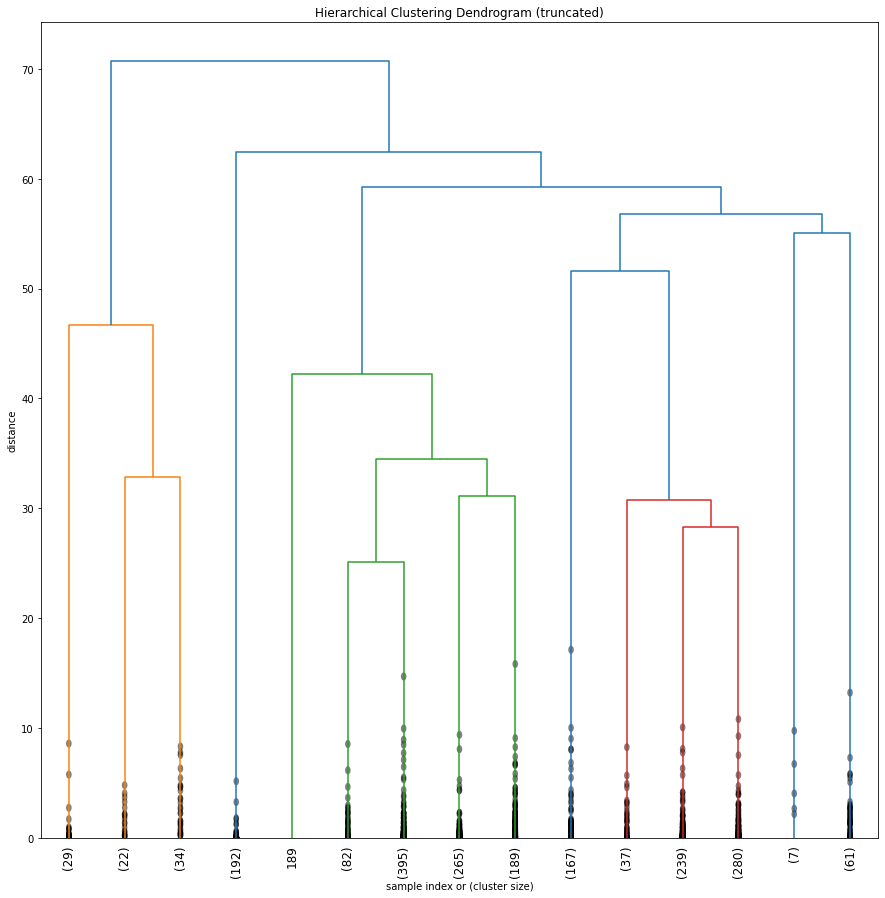

In [8]:
# Hierarchical clustering for the same dataset
# creating a dataset for hierarchical clustering
dataset2_standardized = events_st  # needed imports
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np  # some setting for this notebook to actually show the graphs inline

# you probably won't need this
%matplotlib inline
plt.subplots(1, 1, figsize=(15, 15))
np.set_printoptions(
    precision=5, suppress=True
)  # suppress scientific float notation#creating the linkage matrix
H_cluster = linkage(dataset2_standardized, "ward")
plt.title("Hierarchical Clustering Dendrogram (truncated)")
plt.xlabel("sample index or (cluster size)")
plt.ylabel("distance")
dendrogram(
    H_cluster,
    truncate_mode="lastp",  # show only the last p merged clusters
    p=15,  # show only the last p merged clusters
    leaf_rotation=90.0,
    leaf_font_size=12.0,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

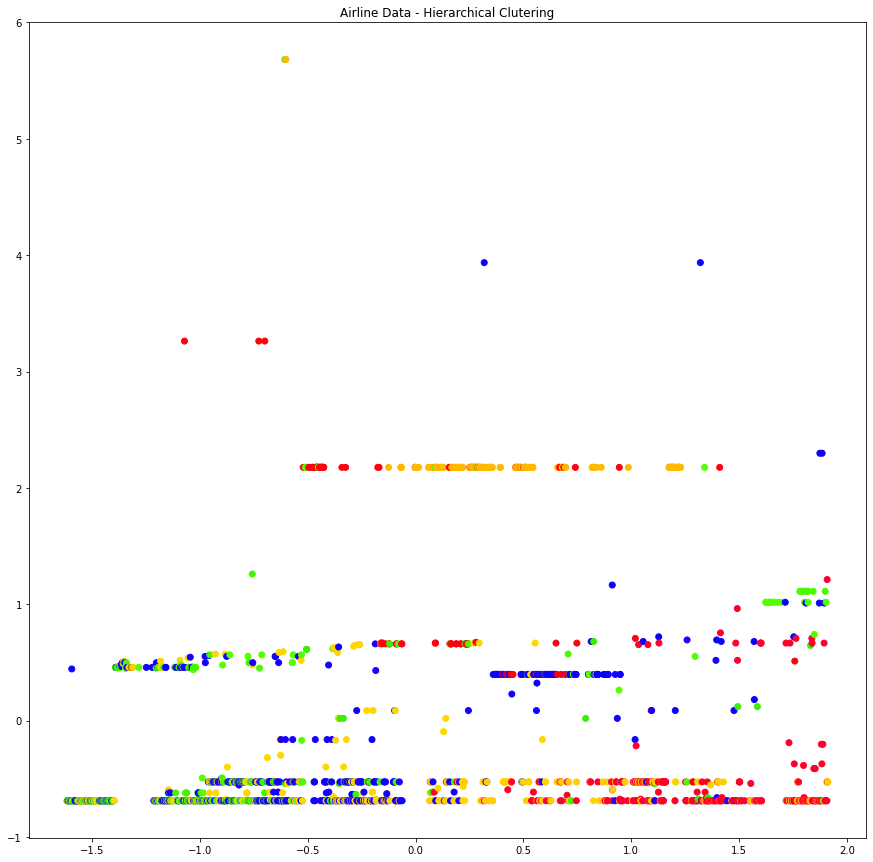

In [9]:
from scipy.cluster.hierarchy import fcluster

k = 15
cluster_2 = fcluster(H_cluster, k, criterion="maxclust")
cluster_2[
    0:30:,
]
plt.figure(figsize=(15, 15))
plt.scatter(
    dataset2_standardized.iloc[:, 0],
    dataset2_standardized.iloc[:, 1],
    c=cluster_2,
    cmap="prism",
)  # plot points with cluster dependent colors
plt.title("Airline Data - Hierarchical Clutering")
plt.show()

In [10]:
# New Dataframe called cluster
cluster_Hierarchical = pd.DataFrame(
    cluster_2
)  # Adding the hierarchical clustering to dataset
dataset2 = events1
dataset2["cluster"] = cluster_Hierarchical
dataset2.head()

,Event ID,Orgc ID,Org ID,Threat Level ID,Published,Attribute Count,Related Events Count,Analysis,Timestamp,Distribution,Published Timestamp,cluster
0,1,2,2,2,True,26,0,2,1470038798,3,1484164818,7
1,2,2,2,1,True,14,0,2,1400509300,3,1400509399,7
2,3,2,2,2,True,12,0,1,1396356715,3,1397311067,8
3,4,2,2,3,True,57,0,2,1396591526,3,1397311447,6
4,5,2,2,2,True,19,0,2,1394802232,3,1397312169,7


# Example Book Chapter

## Dataset download

In [11]:
dataset = pd.read_csv("Example_clustering.csv")
dataset = dataset.sort_values("Timestamp")
dataset0 = dataset.drop([12])
dataset1 = dataset.copy()
dataset1.loc[dataset1["IoC #"] == 13, ["String characteristic"]] = ""
dataset

,IoC #,IoC Type,Boolean characteristic,Numerical characteristic,String characteristic,Timestamp
0,1,sha256,1,90,loremipsum,1672527601
4,5,hostname,0,7650,loremipsumxyz,1672587412
1,2,filename,1,8761,loremipsumdolor,1672614001
2,3,domain,0,2121,loremipsumamet,1672834152
9,10,filename,1,4521,kwxyz,1672894578
5,6,sha256,1,6068,loremipsumdoloramet,1672954682
10,11,filename,0,159,xyzq,1673483296
7,8,sha256,0,9115,consecteturadipiscingelit,1673579514
8,9,domain,0,3673,consecteturadipiscingdolor,1673698521
6,7,sha256,0,400,kwxyzqv,1674289160


## Sequencematcher

In [12]:
S_mat = np.zeros(
    (len(dataset0["String characteristic"]), len(dataset0["String characteristic"]))
)

for ids, s in enumerate(dataset0["String characteristic"]):
    for idt, t in enumerate(dataset0["String characteristic"]):
        seq = difflib.SequenceMatcher(None, s, t)
        S_mat[ids, idt] = np.round(seq.ratio(), 2)
print("S_mat=", S_mat)

dataset0["Sim Rate"] = S_mat[0, :]

S_type = np.zeros((len(dataset0["IoC Type"]), len(dataset0["IoC Type"])))

for ids, s in enumerate(dataset0["IoC Type"]):
    for idt, t in enumerate(dataset0["IoC Type"]):
        if t == s:
            S_type[ids, idt] = 1
print("S_type=", S_type)

S_comb = S_mat + S_type

for ids, s in enumerate(S_comb[0, :]):
    for idt, t in enumerate(S_comb[:, 0]):
        if idt == ids:
            S_comb[ids, idt] = 0

print(S_comb)

np.savetxt("12-IoC.csv", S_comb, delimiter=",", fmt="%.3f")

S_mat= [[1.   0.87 0.8  0.83 0.   0.69 0.   0.29 0.17 0.   0.74 0.12]
 [0.87 1.   0.71 0.74 0.33 0.62 0.35 0.26 0.15 0.3  0.67 0.11]
 [0.8  0.71 1.   0.69 0.   0.88 0.   0.3  0.49 0.   0.62 0.21]
 [0.83 0.74 0.69 1.   0.   0.85 0.   0.36 0.15 0.   0.9  0.16]
 [0.   0.33 0.   0.   1.   0.   0.67 0.   0.   0.83 0.   0.  ]
 [0.69 0.62 0.88 0.85 0.   1.   0.   0.32 0.44 0.   0.78 0.23]
 [0.   0.35 0.   0.   0.67 0.   1.   0.   0.   0.73 0.   0.  ]
 [0.29 0.26 0.3  0.21 0.   0.18 0.   1.   0.86 0.   0.24 0.61]
 [0.17 0.15 0.49 0.15 0.   0.44 0.   0.86 1.   0.   0.14 0.48]
 [0.   0.3  0.   0.   0.83 0.   0.73 0.   0.   1.   0.   0.  ]
 [0.74 0.67 0.62 0.9  0.   0.78 0.   0.33 0.14 0.   1.   0.15]
 [0.18 0.16 0.21 0.16 0.   0.23 0.   0.61 0.48 0.   0.24 1.  ]]
S_type= [[1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0

In [13]:
S_mat = np.zeros(
    (len(dataset1["String characteristic"]), len(dataset1["String characteristic"]))
)

for ids, s in enumerate(dataset1["String characteristic"]):
    for idt, t in enumerate(dataset1["String characteristic"]):
        seq = difflib.SequenceMatcher(None, s, t)
        S_mat[ids, idt] = np.round(seq.ratio(), 2)
print("S_mat=", S_mat)

dataset1["Sim Rate"] = S_mat[0, :]

S_type = np.zeros((len(dataset1["IoC Type"]), len(dataset1["IoC Type"])))

for ids, s in enumerate(dataset1["IoC Type"]):
    for idt, t in enumerate(dataset1["IoC Type"]):
        if t == s:
            S_type[ids, idt] = 1
print("S_type=", S_type)

S_comb = S_mat + S_type

for ids, s in enumerate(S_comb[0, :]):
    for idt, t in enumerate(S_comb[:, 0]):
        if idt == ids:
            S_comb[ids, idt] = 0

print(S_comb)

np.savetxt("13-IoC-incomplete.csv", S_comb, delimiter=",", fmt="%.3f")

S_mat= [[1.   0.87 0.8  0.83 0.   0.69 0.   0.29 0.17 0.   0.74 0.12 0.  ]
 [0.87 1.   0.71 0.74 0.33 0.62 0.35 0.26 0.15 0.3  0.67 0.11 0.  ]
 [0.8  0.71 1.   0.69 0.   0.88 0.   0.3  0.49 0.   0.62 0.21 0.  ]
 [0.83 0.74 0.69 1.   0.   0.85 0.   0.36 0.15 0.   0.9  0.16 0.  ]
 [0.   0.33 0.   0.   1.   0.   0.67 0.   0.   0.83 0.   0.   0.  ]
 [0.69 0.62 0.88 0.85 0.   1.   0.   0.32 0.44 0.   0.78 0.23 0.  ]
 [0.   0.35 0.   0.   0.67 0.   1.   0.   0.   0.73 0.   0.   0.  ]
 [0.29 0.26 0.3  0.21 0.   0.18 0.   1.   0.86 0.   0.24 0.61 0.  ]
 [0.17 0.15 0.49 0.15 0.   0.44 0.   0.86 1.   0.   0.14 0.48 0.  ]
 [0.   0.3  0.   0.   0.83 0.   0.73 0.   0.   1.   0.   0.   0.  ]
 [0.74 0.67 0.62 0.9  0.   0.78 0.   0.33 0.14 0.   1.   0.15 0.  ]
 [0.18 0.16 0.21 0.16 0.   0.23 0.   0.61 0.48 0.   0.24 1.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.  ]]
S_type= [[1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 1.

In [14]:
S_mat = np.zeros(
    (len(dataset["String characteristic"]), len(dataset["String characteristic"]))
)

for ids, s in enumerate(dataset["String characteristic"]):
    for idt, t in enumerate(dataset["String characteristic"]):
        seq = difflib.SequenceMatcher(None, s, t)
        S_mat[ids, idt] = np.round(seq.ratio(), 2)
print("S_mat=", S_mat)

dataset["Sim Rate"] = S_mat[0, :]

S_type = np.zeros((len(dataset["IoC Type"]), len(dataset["IoC Type"])))

for ids, s in enumerate(dataset["IoC Type"]):
    for idt, t in enumerate(dataset["IoC Type"]):
        if t == s:
            S_type[ids, idt] = 1
print("S_type=", S_type)

S_comb = S_mat + S_type

for ids, s in enumerate(S_comb[0, :]):
    for idt, t in enumerate(S_comb[:, 0]):
        if idt == ids:
            S_comb[ids, idt] = 0

print(S_comb)

np.savetxt("13-IoC-complete.csv", S_comb, delimiter=",", fmt="%.3f")

S_mat= [[1.   0.87 0.8  0.83 0.   0.69 0.   0.29 0.17 0.   0.74 0.12 0.53]
 [0.87 1.   0.71 0.74 0.33 0.62 0.35 0.26 0.15 0.3  0.67 0.11 0.45]
 [0.8  0.71 1.   0.69 0.   0.88 0.   0.3  0.49 0.   0.62 0.21 0.5 ]
 [0.83 0.74 0.69 1.   0.   0.85 0.   0.36 0.15 0.   0.9  0.16 0.52]
 [0.   0.33 0.   0.   1.   0.   0.67 0.   0.   0.83 0.   0.   0.29]
 [0.69 0.62 0.88 0.85 0.   1.   0.   0.32 0.44 0.   0.78 0.23 0.43]
 [0.   0.35 0.   0.   0.67 0.   1.   0.   0.   0.73 0.   0.   0.31]
 [0.29 0.26 0.3  0.21 0.   0.18 0.   1.   0.86 0.   0.24 0.61 0.24]
 [0.17 0.15 0.49 0.15 0.   0.44 0.   0.86 1.   0.   0.14 0.48 0.17]
 [0.   0.3  0.   0.   0.83 0.   0.73 0.   0.   1.   0.   0.   0.25]
 [0.74 0.67 0.62 0.9  0.   0.78 0.   0.33 0.14 0.   1.   0.15 0.46]
 [0.18 0.16 0.21 0.16 0.   0.23 0.   0.61 0.48 0.   0.24 1.   0.18]
 [0.53 0.45 0.5  0.52 0.29 0.43 0.31 0.24 0.17 0.25 0.46 0.18 1.  ]]
S_type= [[1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 1.

In [15]:
IoC_Type_ID = dataset["IoC Type"].astype("category").cat.codes
dataset1 = dataset.drop(
    [
        "String characteristic",
        "IoC Type",
        "Boolean characteristic",
    ],
    axis=1,
)
dataset1["IoC Type ID"] = IoC_Type_ID
dataset_st = preprocessing.scale(dataset1)
dataset_st = pd.DataFrame(dataset_st)
dataset_st

/home/gillard/.local/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:240: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


,0,1,2,3,4
0,-1.603567,-1.183821,-1.227070,1.475524,1.274755
1,-0.534522,1.251978,-1.148801,1.117243,0.000000
2,-1.336306,1.609937,-1.114006,0.924322,-0.637377
3,-1.069045,-0.529442,-0.825915,1.007003,-1.274755
4,0.801784,0.243828,-0.746841,-1.280483,-0.637377
5,-0.267261,0.742264,-0.668189,0.621162,1.274755
6,1.069045,-1.161589,0.023559,-1.280483,-0.637377
7,0.267261,1.723994,0.149471,-0.481241,1.274755
8,0.534522,-0.029394,0.305204,-0.811962,-1.274755
9,0.000000,-1.083940,1.078118,-1.280483,1.274755


/home/gillard/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/gillard/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/gillard/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/gillard/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/gillard/.local/lib/pyt

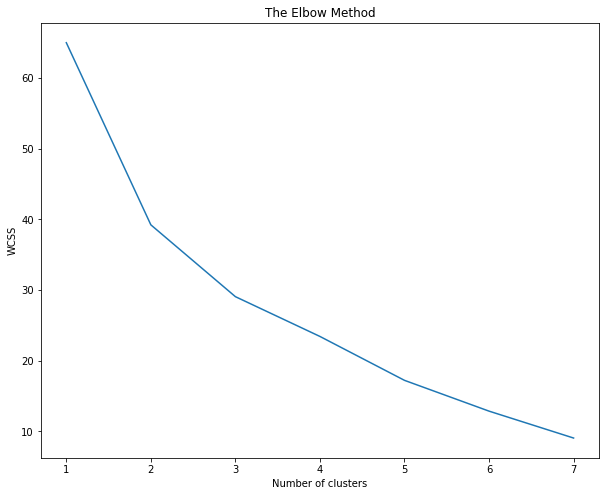

In [16]:
plt.figure(figsize=(10, 8))
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(dataset_st)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 8), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

## PCA Analysis

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features = np.array(dataset1.columns)

x = dataset1.loc[:, features].values
x = StandardScaler().fit_transform(x)
a = max(dataset1["IoC Type ID"])
pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(x)

principal_breast_Df = pd.DataFrame(
    data=principalComponents_breast,
    columns=[
        "principal component 1",
        "principal component 2",
    ],
)
# print(
#     "Explained variation per principal component: {}".format(
#         pca_breast.explained_variance_ratio_
#     )
# )

In [18]:
import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1",y="principal component 2",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=dataset1,
    legend="full",
    alpha=0.3
)

ValueError: Could not interpret value `principal component 1` for parameter `x`

<Figure size 1152x720 with 0 Axes>

In [ ]:
# Hierarchical clustering for the same dataset
# creating a dataset for hierarchical clustering
dataset2_standardized = dataset_st  # needed imports
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np  # some setting for this notebook to actually show the graphs inline

# you probably won't need this
%matplotlib inline
plt.subplots(1, 1, figsize=(15, 15))
np.set_printoptions(
    precision=4, suppress=True
)  # suppress scientific float notation#creating the linkage matrix
H_cluster = linkage(dataset2_standardized, "ward")
plt.title("Hierarchical Clustering Dendrogram (truncated)")
plt.xlabel("sample index or (cluster size)")
plt.ylabel("distance")
dendrogram(
    H_cluster,
    truncate_mode="lastp",  # show only the last p merged clusters
    p=4,  # show only the last p merged clusters
    leaf_rotation=90.0,
    leaf_font_size=12.0,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [ ]:
from scipy.cluster.hierarchy import fcluster

k = 5
cluster_2 = fcluster(H_cluster, k, criterion="maxclust")
cluster_2[
    0:30:,
]
plt.figure(figsize=(15, 15))
plt.scatter(
    dataset2_standardized.iloc[:, 0],
    dataset2_standardized.iloc[:, 1],
    c=cluster_2,
    cmap="prism",
)  # plot points with cluster dependent colors
plt.title("Airline Data - Hierarchical Clutering")
plt.show()

In [ ]:
# New Dataframe called cluster
cluster_Hierarchical = pd.DataFrame(
    cluster_2
)  # Adding the hierarchical clustering to dataset
dataset2 = dataset1
dataset2["cluster"] = cluster_Hierarchical
dataset2["String characteristic"] = dataset["String characteristic"]
dataset2